#### Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
from tensorflow.keras.layers import Dense,RepeatVector, LSTM, Dropout
from tensorflow.keras.layers import Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.layers import Bidirectional, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

#### Importing data

In [4]:
train_data_merged=pd.read_csv(r"C:\Adv_proj_Rossman_sales_project\rossman_sales_prediction_nexthikes\data\modified_train.csv")
test_data_merged=pd.read_csv(r"C:\Adv_proj_Rossman_sales_project\rossman_sales_prediction_nexthikes\data\modified_test.csv")

# Trend Analysis

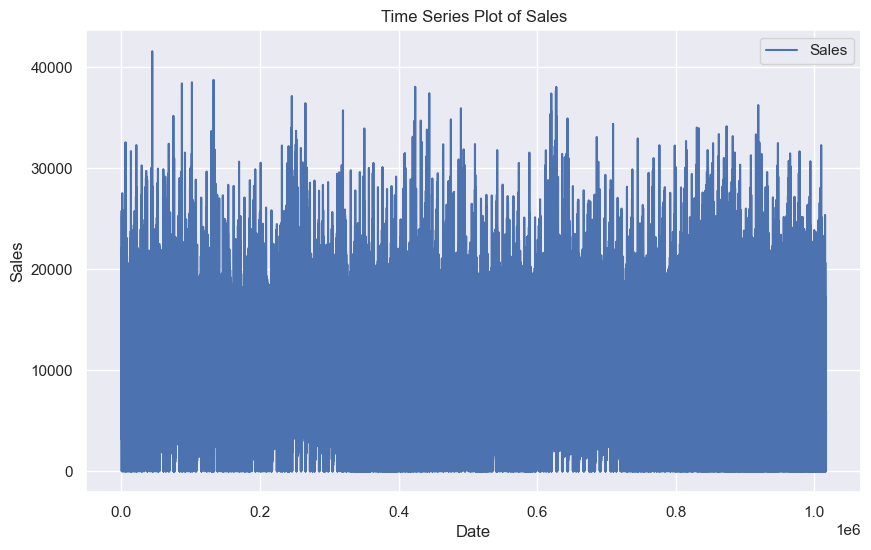

In [5]:
# Plot the time series data
plt.figure(figsize=(10, 6))
plt.plot(train_data_merged['Sales'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

#### data values are relatively constant or consistent across the entire range of the x-axis. In other words, there is little variation or change in the data as the sales values increase or decrease.

In [6]:
# Create a 'Date' column by combining 'Year', 'Month', and 'Day' columns
train_data_merged['Date'] = pd.to_datetime(train_data_merged[['Year', 'Month', 'Day']])

# Set the 'Date' column as the index
train_data_merged.set_index('Date', inplace=True)

# Sort the data by date
train_data_merged.sort_index(inplace=True)

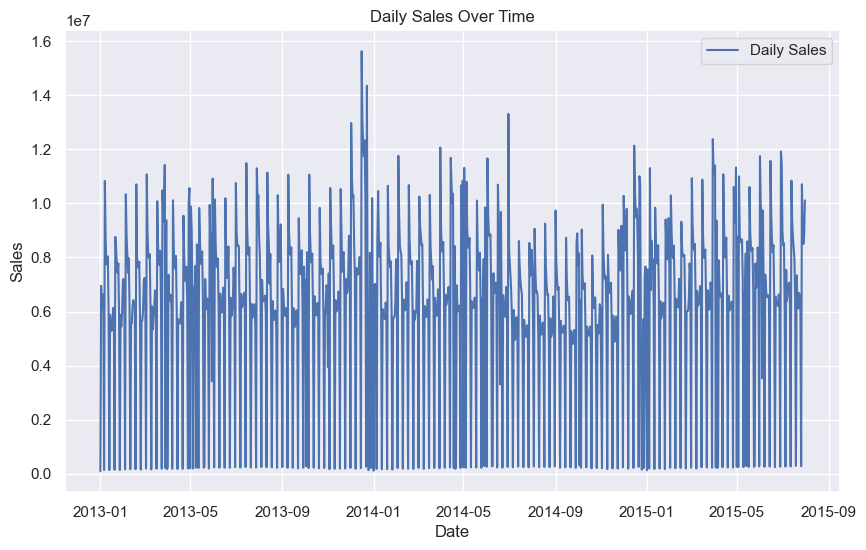

In [7]:
# Resample the data on a daily basis and calculate the daily sum of sales
daily_sales = train_data_merged['Sales'].resample('D').sum()

# Plot daily sales over time
plt.figure(figsize=(10, 6))
plt.plot(daily_sales.index, daily_sales.values, label='Daily Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.show()


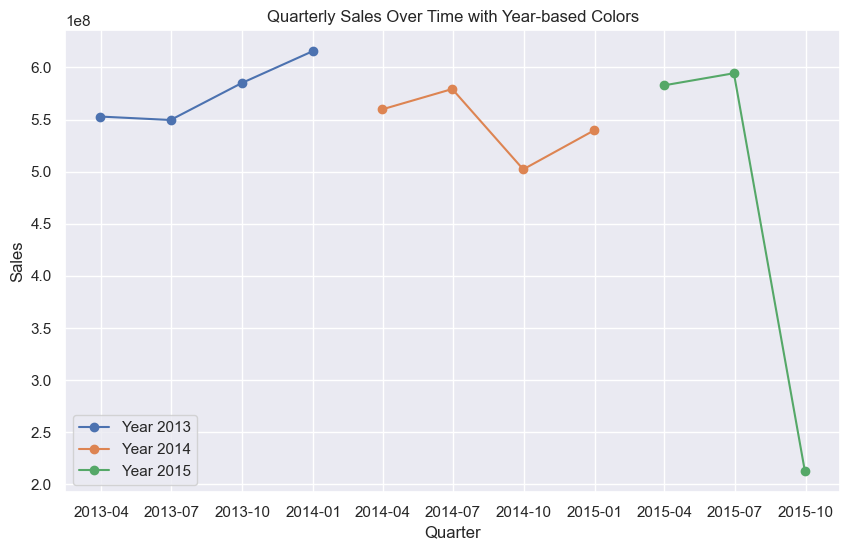

In [8]:
# Resample the data on a quarterly basis and calculate the sum of sales
quarterly_sales = train_data_merged['Sales'].resample('Q').sum()

# Extract years from the index
years = quarterly_sales.index.year

# Plot quarterly sales over time with colors based on year
plt.figure(figsize=(10, 6))
for year in sorted(years.unique()):
    quarterly_sales_year = quarterly_sales[years == year]
    plt.plot(quarterly_sales_year.index, quarterly_sales_year.values, marker='o', linestyle='-', label=f'Year {year}')

plt.xlabel('Quarter')
plt.ylabel('Sales')
plt.title('Quarterly Sales Over Time with Year-based Colors')
plt.legend()
plt.grid(True)
plt.show()

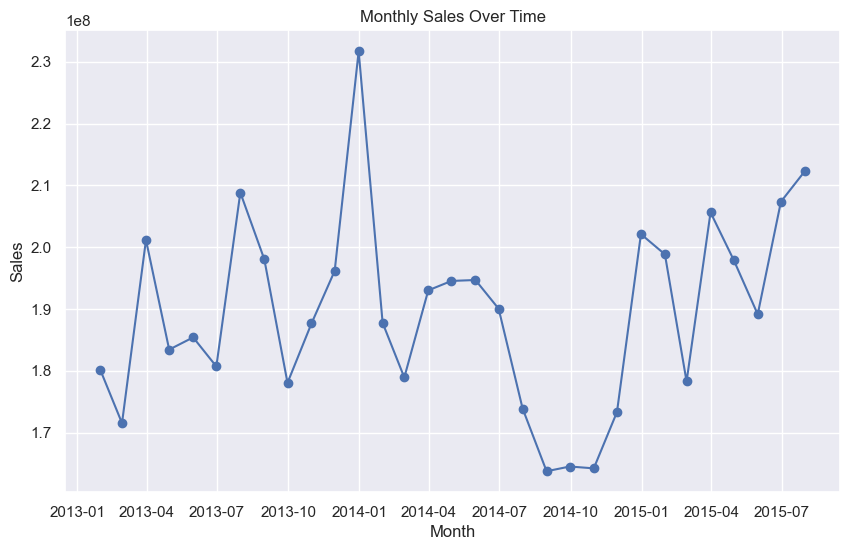

In [9]:
# Resample the data on a monthly basis and calculate the sum of sales
monthly_sales = train_data_merged['Sales'].resample('M').sum()

# Plot monthly sales over time
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True)
plt.show()

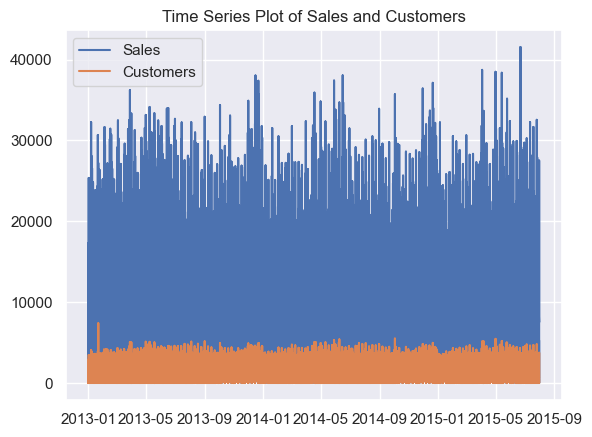

In [10]:
# Adding Multiple Time Series:
plt.plot(train_data_merged['Sales'], label='Sales')
plt.plot(train_data_merged['Customers'], label='Customers')
plt.title('Time Series Plot of Sales and Customers')
plt.legend()

#####   the sales is constant as per the customers


### Checking the trends and seasonality in the data

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

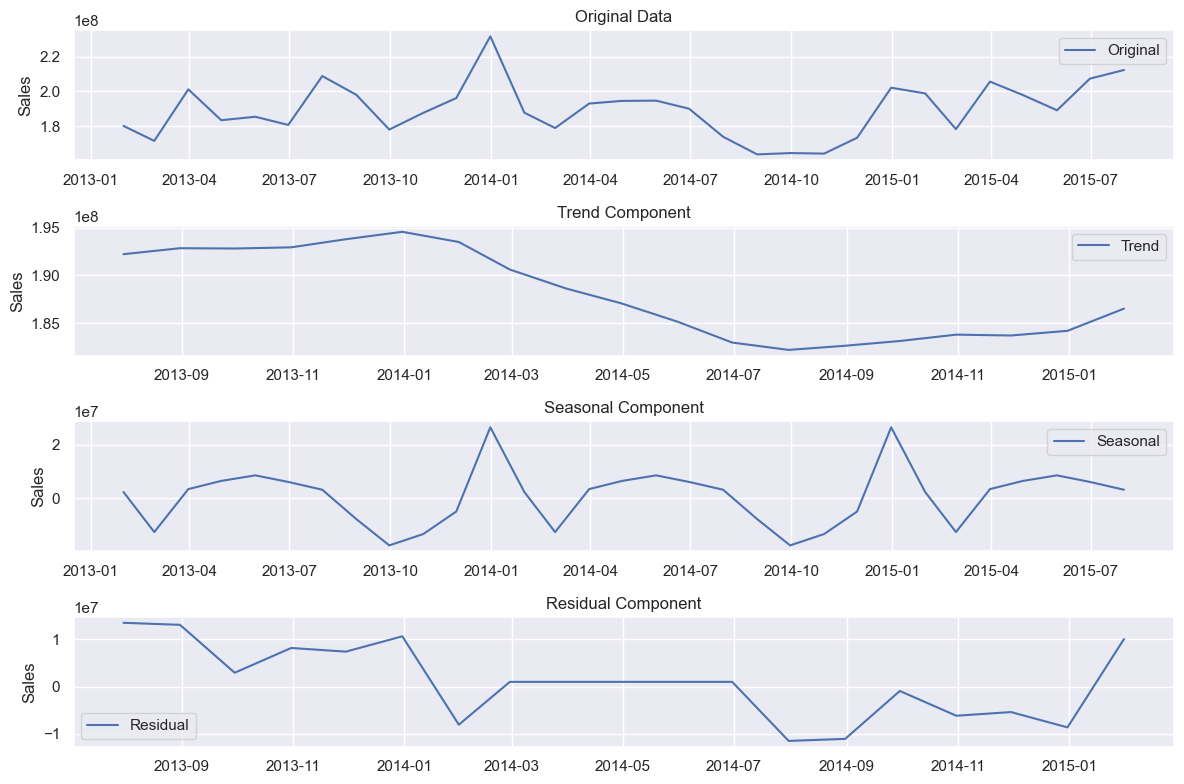

In [12]:
# Perform decomposition to check for trends and seasonality
decomposition = seasonal_decompose(monthly_sales, model='additive')

# Plot original, trend, seasonal, and residual components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(monthly_sales, label='Original')
plt.legend()
plt.ylabel('Sales')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Trend')
plt.legend()
plt.ylabel('Sales')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend()
plt.ylabel('Sales')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residual')
plt.legend()
plt.ylabel('Sales')
plt.title('Residual Component')

plt.tight_layout()
plt.show()


*  Trend Component: The trend component represents the underlying long-term movement or direction in the data. In our analysis, we noticed slight variations in the trend over time. This suggests that the overall pattern of sales has experienced subtle changes or fluctuations, possibly influenced by external factors, market trends, or business strategies.

*  Seasonality Component: Seasonality refers to recurring patterns that repeat at fixed intervals. Interestingly, we found that the seasonality component remained relatively constant throughout the time period under consideration. This implies that the sales data consistently exhibits a similar repeating pattern at regular intervals, which could be attributed to factors such as holidays, promotions, or other recurrent events.

*  Residuals Component: The residuals component captures the random and unpredictable fluctuations in the data that are not accounted for by the trend and seasonality components. Our analysis revealed varying residuals, indicating that there are periods where the observed sales values deviate from what can be explained by the trend and seasonality. These deviations might be caused by unexpected events, noise, or unmodeled factors.

*  Overall, this time series decomposition sheds light on the different underlying components influencing the 'Sales' data. The varying trends and residuals suggest a dynamic business environment, where external factors and fluctuations play a role. The consistent seasonality component indicates a recurring pattern that remains stable over time. This information can be valuable for understanding sales patterns, making forecasts, and making informed business decisions to optimize strategies and operations

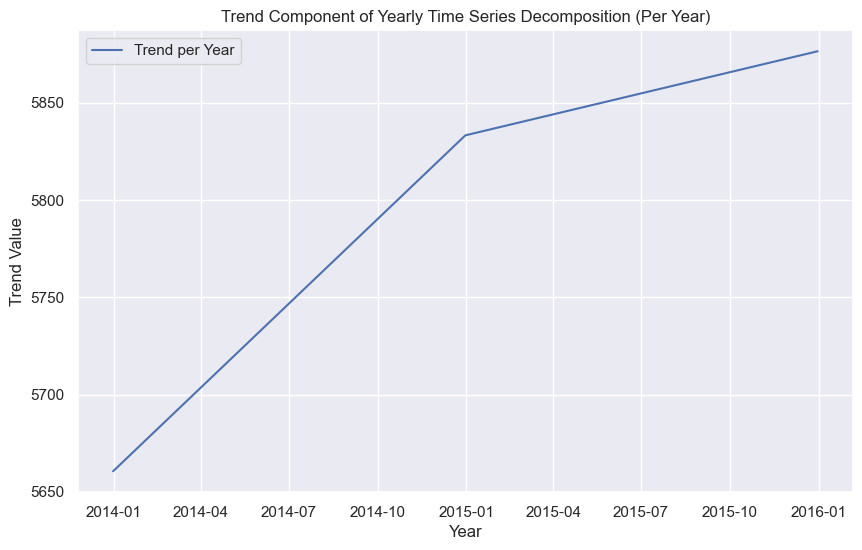

In [13]:
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=365)
trend_data = decomposition_result.trend

# Grouping trend data by year and calculate mean
trend_data_per_year = trend_data.resample('Y').mean()

# Plot the trend component per year
plt.figure(figsize=(10, 6))
plt.plot(trend_data_per_year.index, trend_data_per_year, label='Trend per Year')
plt.title('Trend Component of Yearly Time Series Decomposition (Per Year)')
plt.xlabel('Year')
plt.ylabel('Trend Value')
plt.legend()
plt.show()

The yearly time series decomposition highlights a consistent increasing trend component over each year. This suggests a steady growth in sales performance, possibly influenced by expanding customer engagement, heightened demand, or effective business strategies. This valuable insight offers a strategic advantage, enabling businesses to align resources and decisions with the upward sales trajectory for enhanced growth and competitiveness.

<Figure size 2000x1000 with 0 Axes>

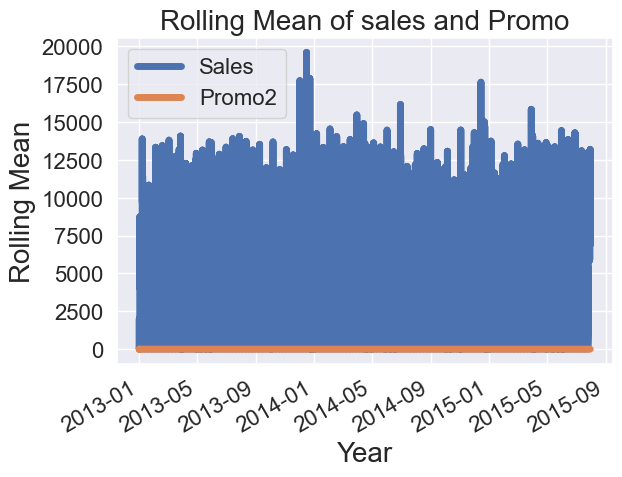

In [14]:
# Choose the columns for which you want to calculate the rolling mean
selected_columns = ['Sales','Promo2']  # Replace with your actual column names

# Calculate the rolling mean with a window size of 12 months for each selected column
rolling_means = train_data_merged[selected_columns].rolling(window=12).mean()

# Plot the rolling means of the selected columns
plt.figure(figsize=(20, 10))
rolling_means.plot(linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Rolling Mean', fontsize=20)
plt.title('Rolling Mean of sales and Promo', fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(True)
plt.show()

# Resampled time series

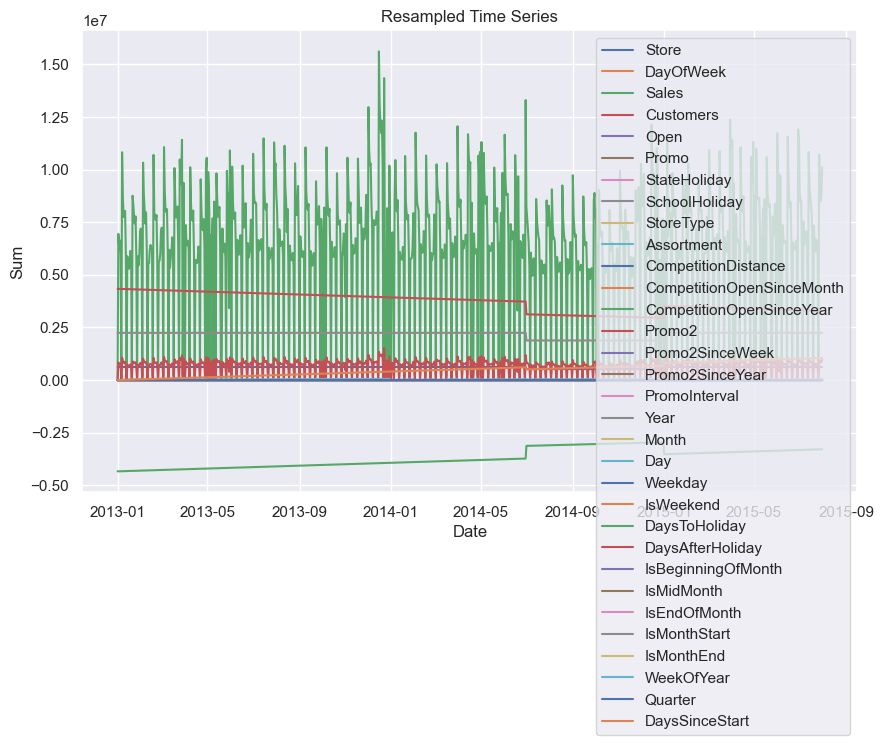

In [15]:
# Convert the index to datetime format
train_data_merged.index = pd.to_datetime(train_data_merged.index)

# Selecting only numeric columns for summation
numeric_columns = train_data_merged.select_dtypes(include=['number']).columns

# Resampling the data
train_data_resampled = train_data_merged[numeric_columns].resample('D').sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()


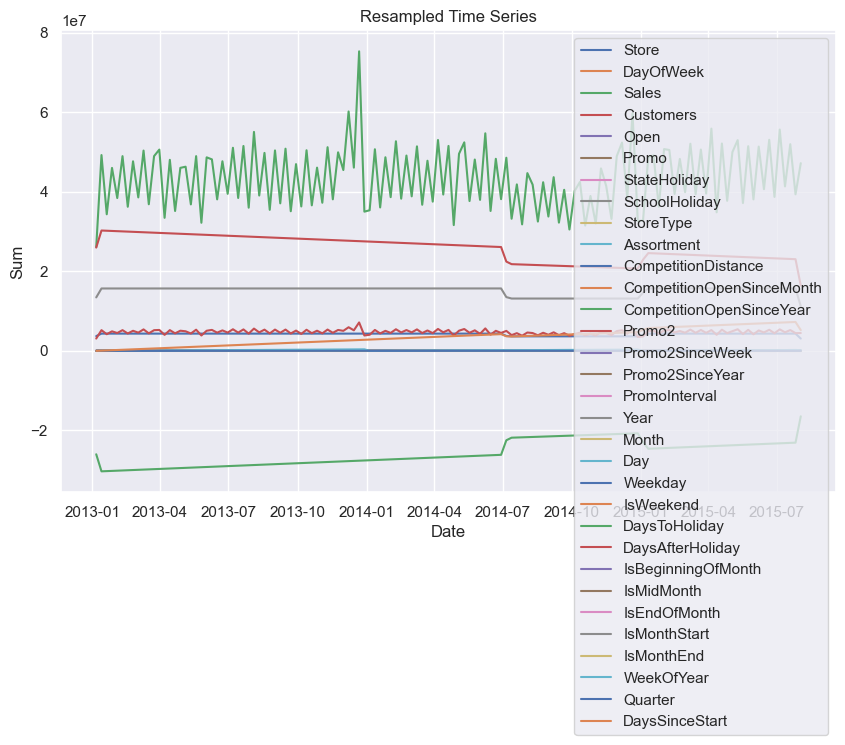

In [16]:
# Resampling the data at a lower frequency (e.g., weekly) for better visualization
resample_frequency = 'W'  # Adjust this frequency as needed
train_data_resampled = train_data_merged[numeric_columns].resample(resample_frequency).sum()

# Plot the time series
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(train_data_resampled.index, train_data_resampled[column], label=column)
plt.xlabel('Date')
plt.ylabel('Sum')
plt.title('Resampled Time Series')
plt.legend()
plt.show()


In [17]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['Sales', 'Customers']  
train_data_weekly_mean = train_data_merged[columns_to_resample].resample('W').mean()

print(train_data_weekly_mean)

                  Sales   Customers
Date                               
2013-01-06  3906.314098  465.032441
2013-01-13  6313.289174  669.615631
2013-01-20  4404.582319  538.852402
2013-01-27  5898.804484  631.496861
2013-02-03  4928.382960  577.533632
...                 ...         ...
2015-07-05  7135.231390  695.328764
2015-07-12  5303.175144  599.558360
2015-07-19  6663.474568  672.192441
2015-07-26  5048.317104  573.547085
2015-08-02  8471.914439  807.577578

[135 rows x 2 columns]


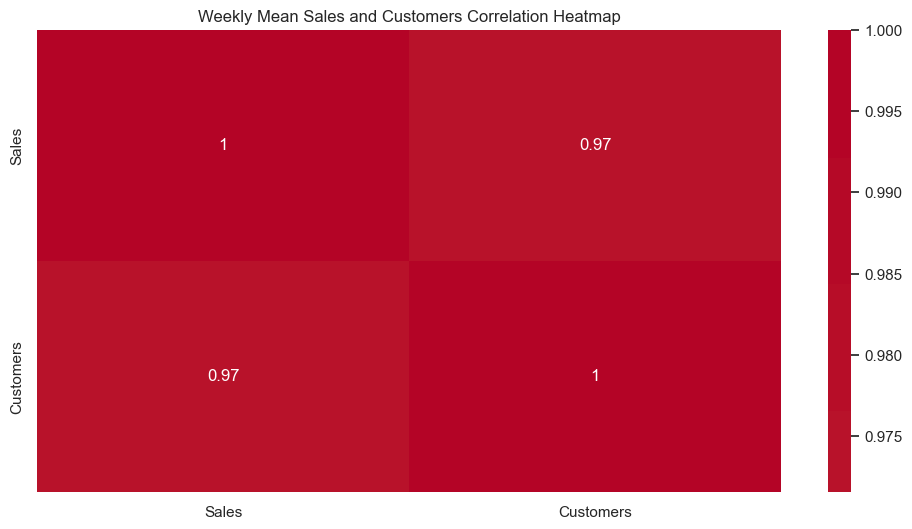

In [18]:
# Resampling the data to a weekly frequency and calculating the mean
columns_to_resample = ['Sales', 'Customers']  
train_data_weekly_mean = train_data_merged[columns_to_resample].resample('W').mean()

# heatmap
plt.figure(figsize=(12, 6))
heatmap = sns.heatmap(train_data_weekly_mean.corr(), annot=True, cmap='coolwarm', center=0)
heatmap.set_title('Weekly Mean Sales and Customers Correlation Heatmap')
plt.show()


## Calculate rolling standard deviation

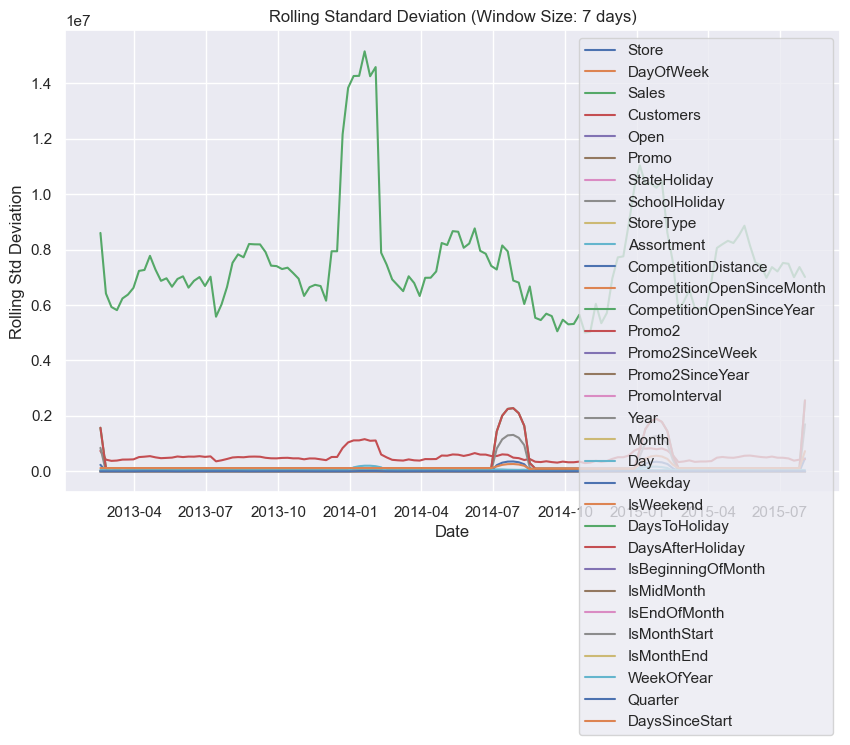

In [19]:
window_size = 7 
rolling_std = train_data_resampled.rolling(window=window_size).std()

# Plotting the rolling standard deviation
plt.figure(figsize=(10, 6))
for column in numeric_columns:
    plt.plot(rolling_std.index, rolling_std[column], label=column)
plt.xlabel('Date')
plt.ylabel('Rolling Std Deviation')
plt.title(f'Rolling Standard Deviation (Window Size: {window_size} days)')
plt.legend()
plt.show()

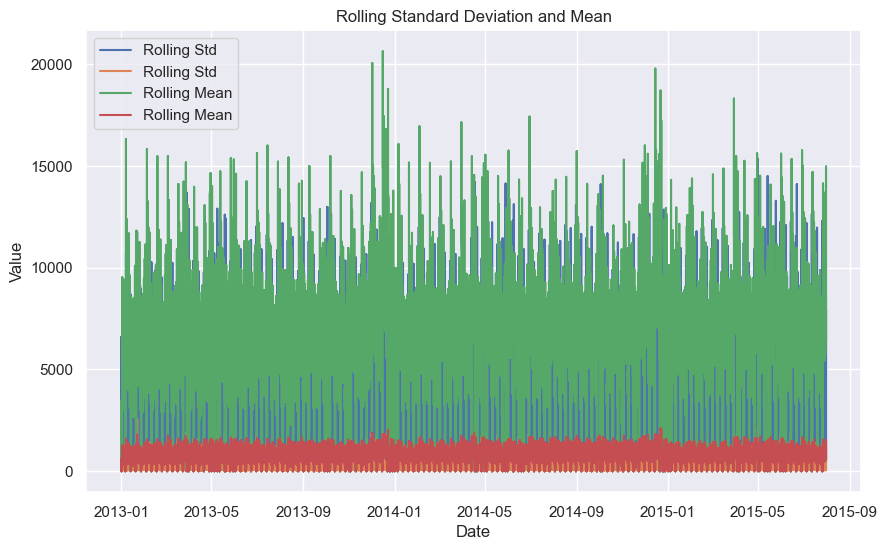

In [20]:
# Columns to calculate rolling statistics for
columns_to_calculate = ['Sales', 'Customers']

# Calculating rolling standard deviation and mean with a window size of 7 days
rolling_std = train_data_merged[columns_to_calculate].rolling(window=7).std()
rolling_mean = train_data_merged[columns_to_calculate].rolling(window=7).mean()

# Plotting the rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(rolling_std, label='Rolling Std')
plt.plot(rolling_mean, label='Rolling Mean')
plt.title('Rolling Standard Deviation and Mean')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [21]:

# descriptive statistics of rolling standard deviation and mean
print("Rolling Standard Deviation:")
print(rolling_std.describe())

print("\nRolling Mean:")
print(rolling_mean.describe())

Rolling Standard Deviation:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   2.118392e+03  2.840919e+02
std    1.466903e+03  2.317120e+02
min    0.000000e+00  0.000000e+00
25%    1.282215e+03  1.538753e+02
50%    1.961211e+03  2.414316e+02
75%    2.807564e+03  3.630961e+02
max    1.534793e+04  2.551930e+03

Rolling Mean:
              Sales     Customers
count  1.017203e+06  1.017203e+06
mean   5.773829e+03  6.331475e+02
std    3.021751e+03  3.169847e+02
min    0.000000e+00  0.000000e+00
25%    4.868143e+03  5.517143e+02
50%    6.162429e+03  6.900000e+02
75%    7.608571e+03  8.240000e+02
max    2.063857e+04  2.115571e+03


# Seasonality Plot:
The seasonality plot displays repeating patterns that occur at regular intervals. It helps identify consistent patterns that recur over time. These patterns could be daily, weekly, monthly, or even yearly. In retail, for instance, if 'Sales' exhibit spikes around the same time each year (e.g., holiday season), it indicates a strong seasonal pattern.

In [22]:
import statsmodels.api as sm

#### first differencing

In [23]:
# Resample to weekly frequency and calculate mean sales
weekly_sales = train_data_merged['Sales'].resample('W').mean()


In [24]:
# Calculate first differences
diff_series = weekly_sales.diff(periods=1).dropna()


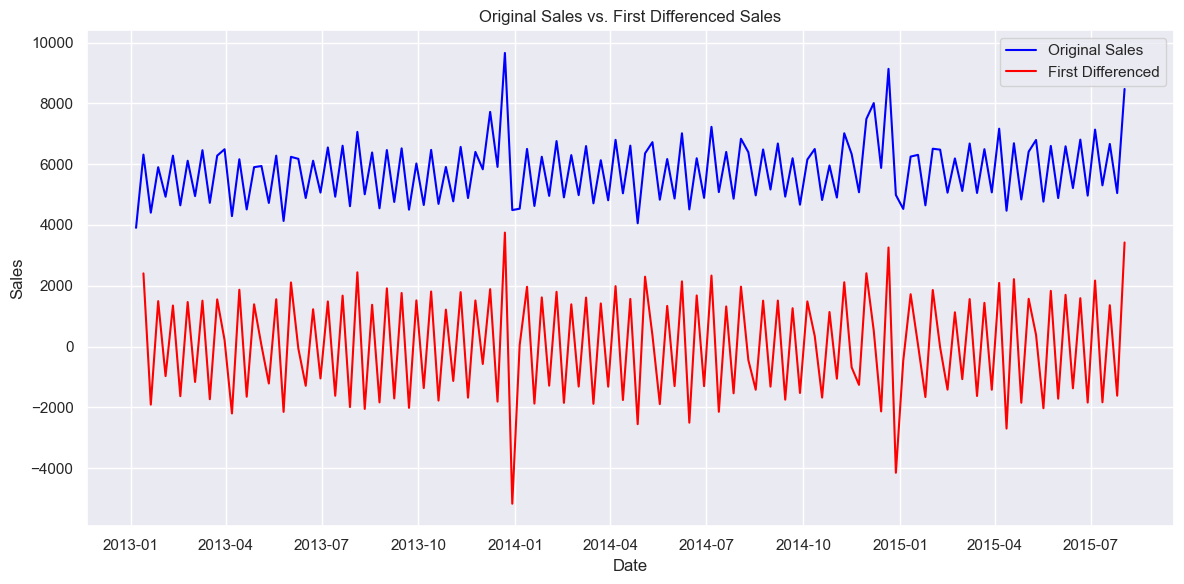

In [25]:

# Create a single plot
plt.figure(figsize=(12, 6))

# Original time series
plt.plot(weekly_sales, label='Original Sales', color='blue')

# First differenced series
plt.plot(diff_series, label='First Differenced', color='red')

plt.title('Original Sales vs. First Differenced Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.tight_layout()
plt.show()

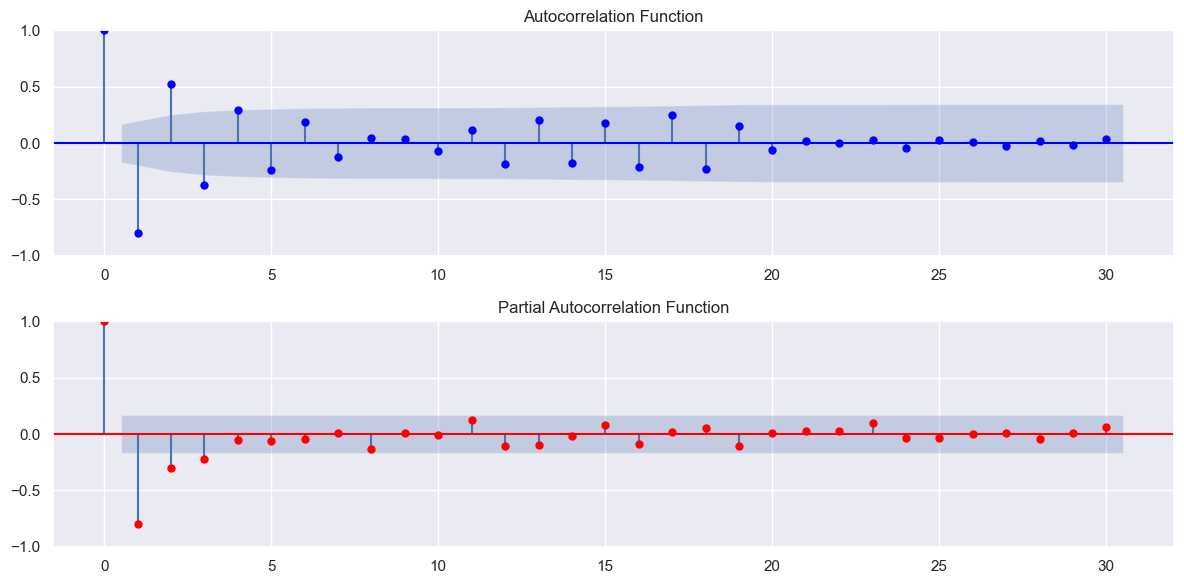

In [26]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create a single plot for ACF and PACF with colors
plt.figure(figsize=(12, 6))

# ACF plot with color
plt.subplot(2, 1, 1)
plot_acf(diff_series, lags=30, ax=plt.gca(), title='Autocorrelation Function', color='blue')

# PACF plot with color
plt.subplot(2, 1, 2)
plot_pacf(diff_series, lags=30, ax=plt.gca(), title='Partial Autocorrelation Function', color='red')

plt.tight_layout()
plt.show()

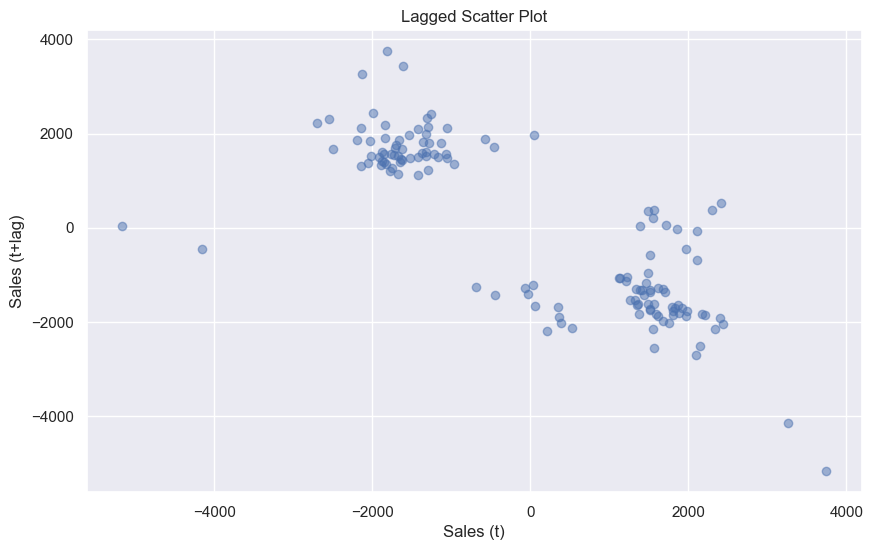

In [27]:
# Create a lagged scatter plot
plt.figure(figsize=(10, 6))
lagged_sales = pd.concat([diff_series, diff_series.shift(-1)], axis=1)
lagged_sales.columns = ['Sales', 'Lagged Sales']
plt.scatter(lagged_sales['Sales'], lagged_sales['Lagged Sales'], alpha=0.5)
plt.title('Lagged Scatter Plot')
plt.xlabel('Sales (t)')
plt.ylabel('Sales (t+lag)')
plt.show()

" t" refers to the current time period or observation, and "t+lag" refers to a future time period that is a specified number of steps ahead of the current time period.

In [28]:
# Resample to weekly frequency and calculate mean sales, customers, and promo
weekly_data = train_data_merged.resample('W').agg({
    'Sales': 'mean',
    'Customers': 'mean',
    'Promo': 'sum'  # Assuming Promo is a binary value (0 or 1)
})

# Calculate first differences
diff_series = weekly_data['Sales'].diff(periods=1).dropna()

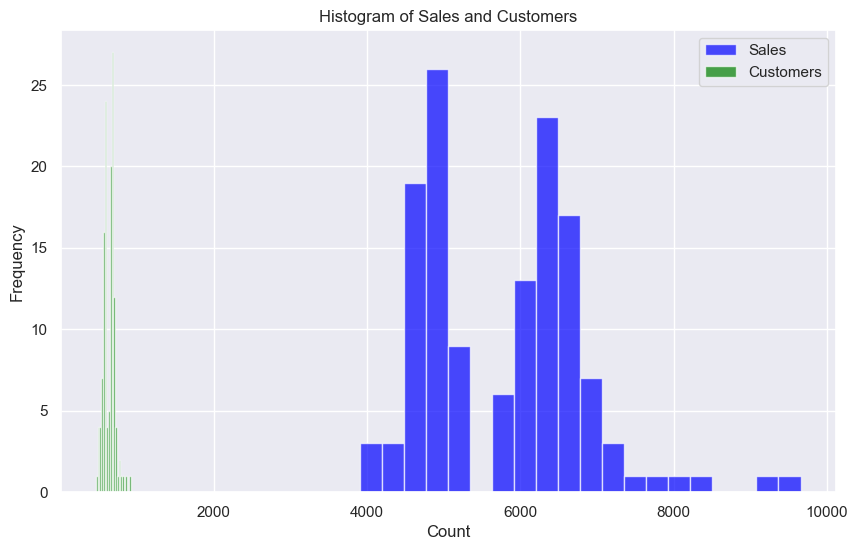

In [29]:
plt.figure(figsize=(10, 6))
plt.hist(weekly_data['Sales'], bins=20, alpha=0.7, color='blue', label='Sales')
plt.hist(weekly_data['Customers'], bins=20, alpha=0.7, color='green', label='Customers')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Sales and Customers')
plt.legend()
plt.show()


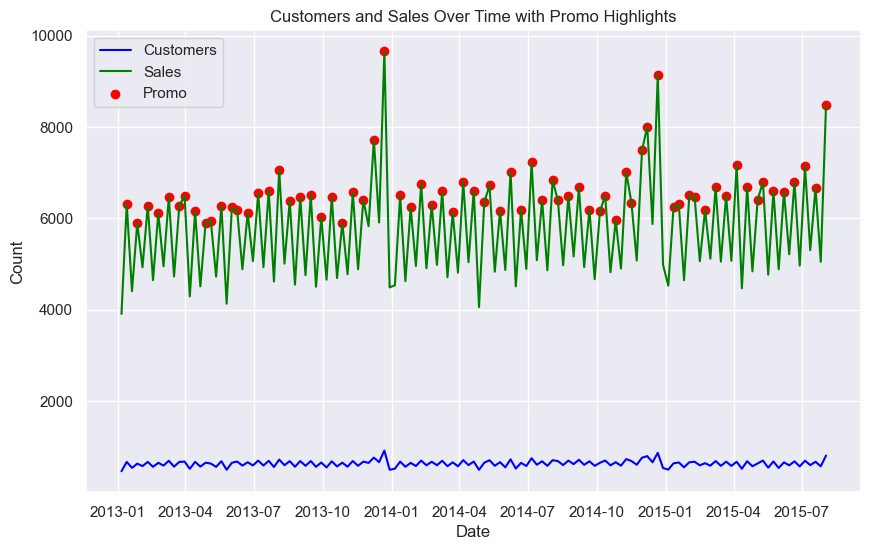

In [30]:
plt.figure(figsize=(10, 6))
plt.plot(weekly_data['Customers'], label='Customers', color='blue')
plt.plot(weekly_data['Sales'], label='Sales', color='green')
promo_indices = weekly_data[weekly_data['Promo'] > 0].index
plt.scatter(promo_indices, weekly_data.loc[promo_indices, 'Sales'], color='red', label='Promo')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Customers and Sales Over Time with Promo Highlights')
plt.legend()
plt.show()

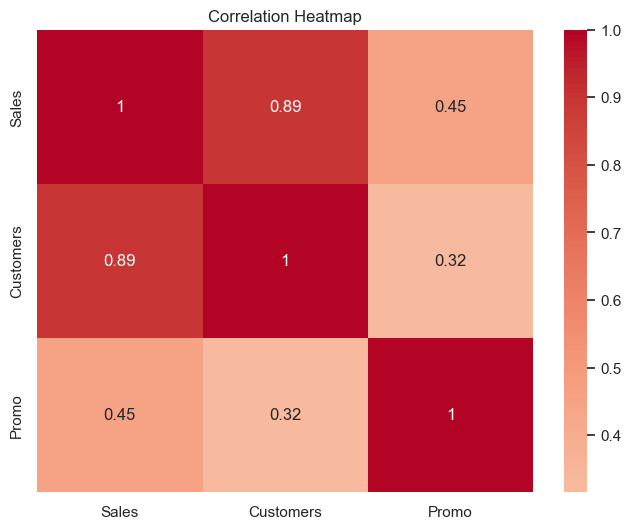

In [31]:
selected_columns = ['Sales', 'Customers', 'Promo']
selected_data = train_data_merged[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_data.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

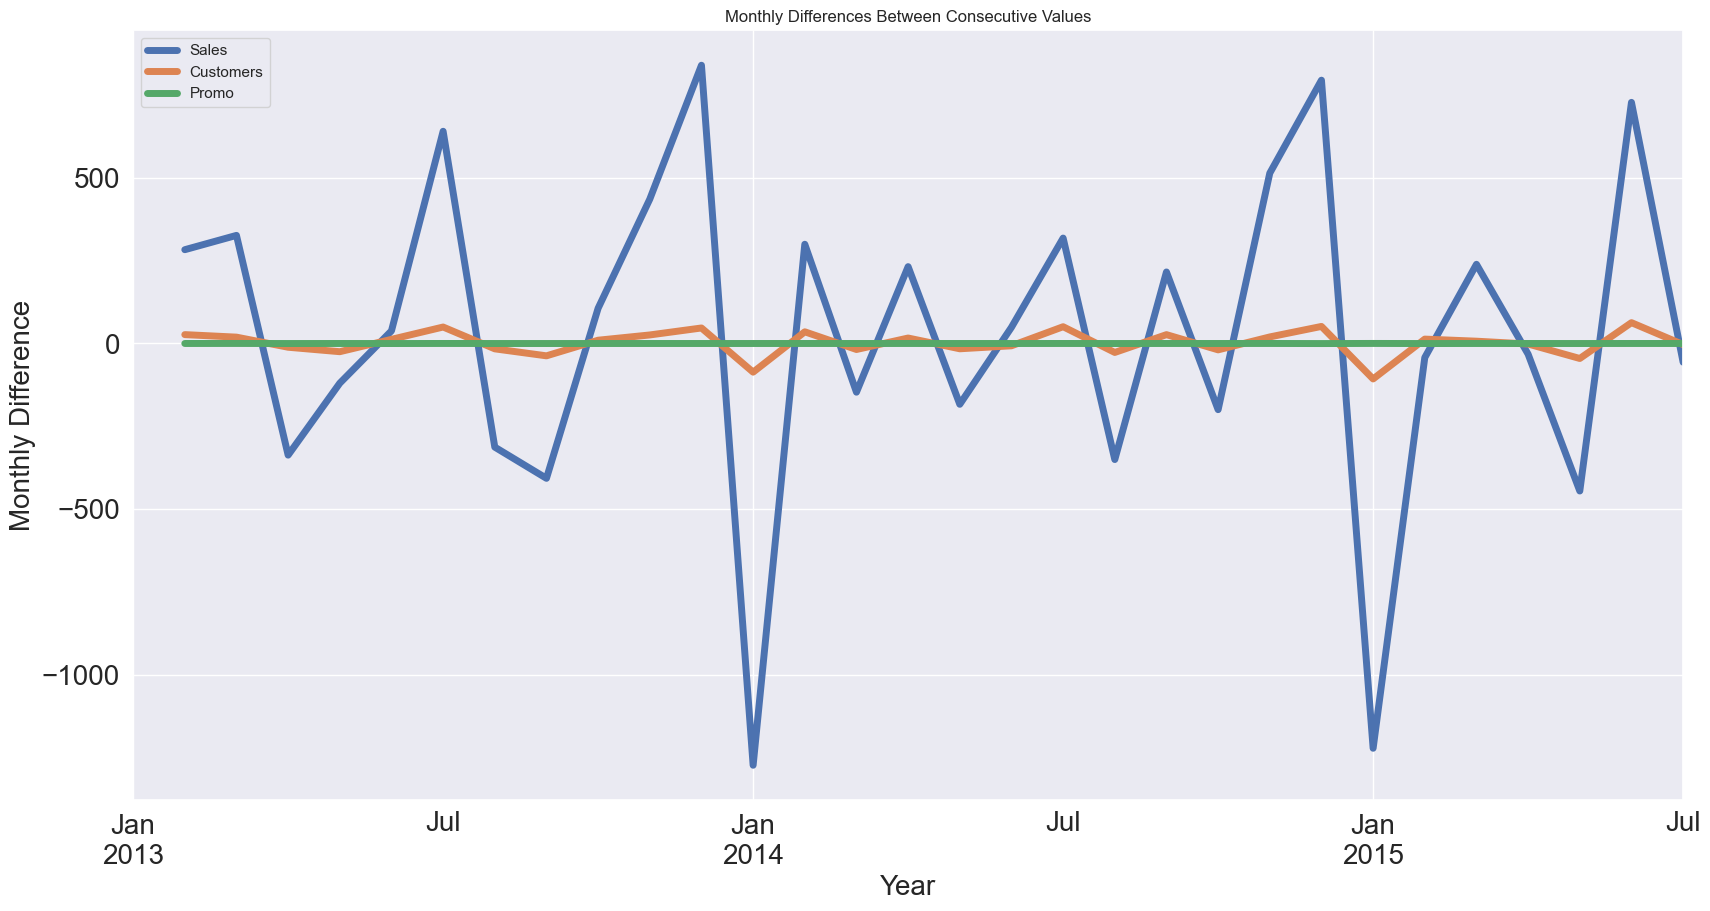

In [32]:
# Select the columns you want to analyze
selected_columns = ['Sales', 'Customers', 'Promo']

# Resample the data to monthly frequency
monthly_data = train_data_merged[selected_columns].resample('M').mean()

# Calculate the differences between consecutive monthly values
monthly_diff_data = monthly_data.diff()

# Plot the differences
monthly_diff_data.plot(figsize=(20, 10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Monthly Difference', fontsize=20)
plt.title('Monthly Differences Between Consecutive Values')
plt.show()

pd.plotting.autocorrelation_plot(train_data_merged['Sales'])

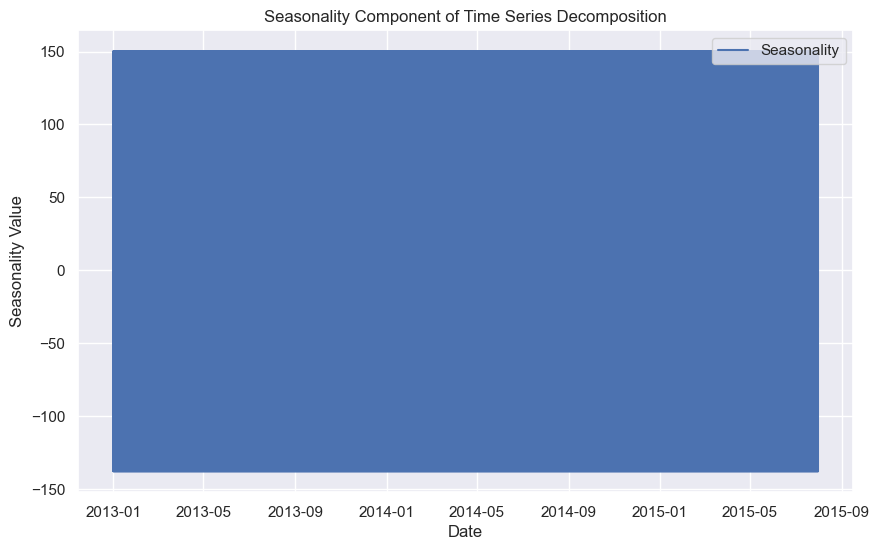

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Performing time series decomposition on the 'Sales' column with yearly frequency
decomposition_result = seasonal_decompose(train_data_merged['Sales'], model='additive', period=365)
seasonality_data = decomposition_result.seasonal

# Create a time index for the x-axis (assuming 'Date' is your index)
time_index = seasonality_data.index

# Plot the seasonality component
plt.figure(figsize=(10, 6))
plt.plot(time_index, seasonality_data, label='Seasonality')
plt.title('Seasonality Component of Time Series Decomposition')
plt.xlabel('Date')
plt.ylabel('Seasonality Value')
plt.legend()
plt.show()

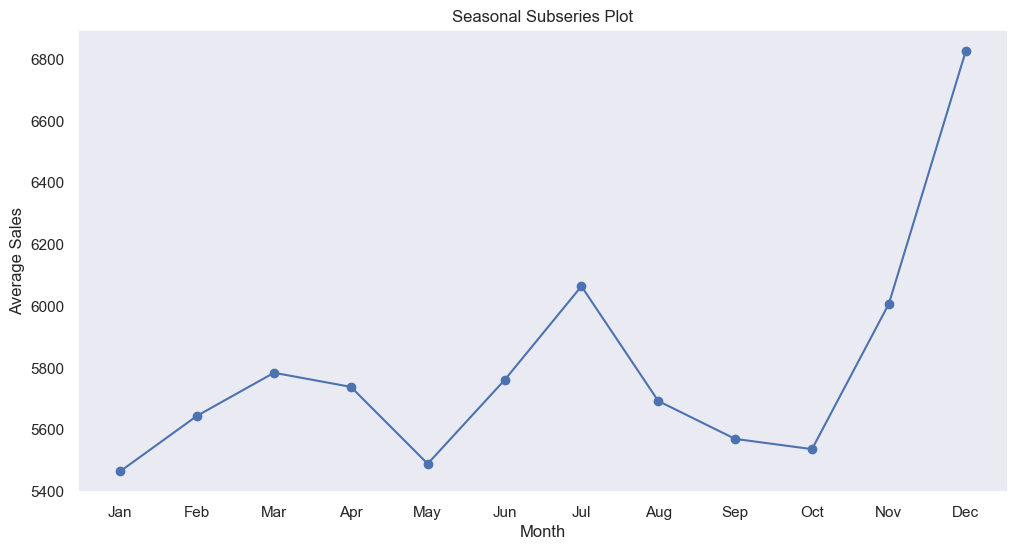

In [34]:
# Seasonal Subseries Plot:

train_data_merged.index = pd.to_datetime(train_data_merged.index)

# Grouping the data by month and calculating the mean for each month
monthly_mean = train_data_merged['Sales'].groupby(train_data_merged.index.month).mean()

# Creating a subseries plot for each month
plt.figure(figsize=(12, 6))
monthly_mean.plot(marker='o')
plt.title('Seasonal Subseries Plot')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.show()

plt.show()

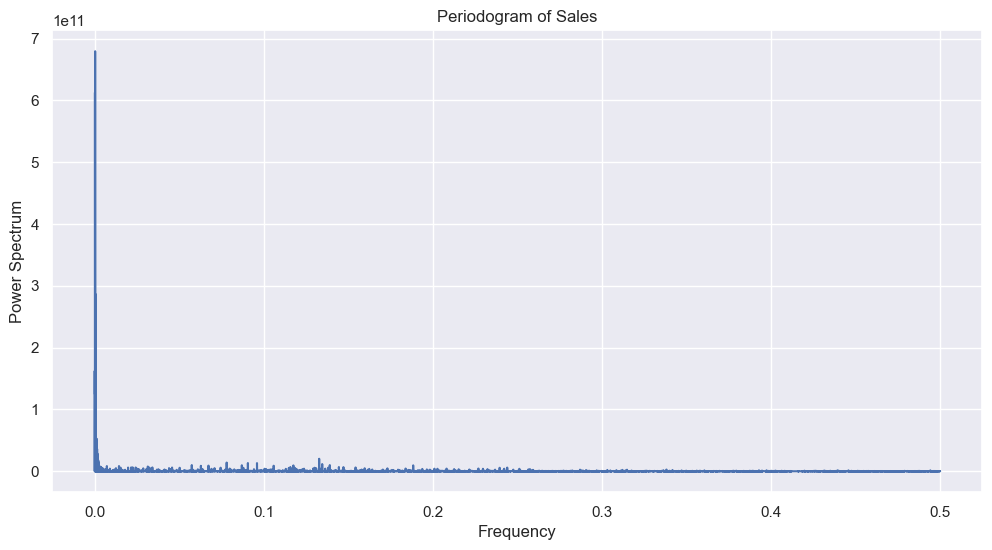

In [35]:
# Periodogram
from scipy.signal import periodogram

# Computing the periodogram of the time series
frequencies, power_spectrum = periodogram(train_data_merged['Sales'])

# Plotting the periodogram
plt.figure(figsize=(12, 6))
plt.plot(frequencies, power_spectrum)
plt.title('Periodogram of Sales')
plt.xlabel('Frequency')
plt.ylabel('Power Spectrum')
plt.show()

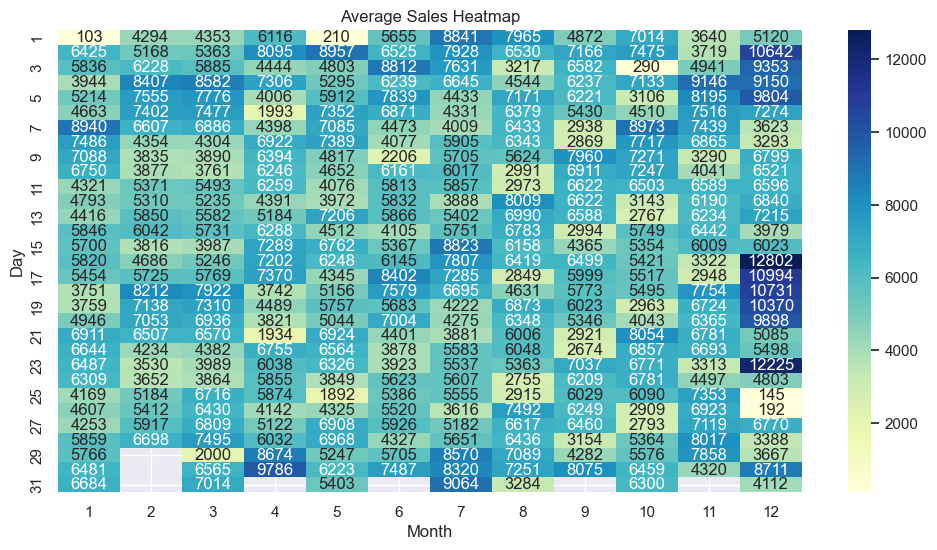

In [36]:
# Heatmap
import numpy as np

# heatmap of average sales across days and months
heatmap_data = train_data_merged.pivot_table(values='Sales', index=train_data_merged.index.day, columns=train_data_merged.index.month, aggfunc=np.mean)

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title('Average Sales Heatmap')
plt.xlabel('Month')
plt.ylabel('Day')
plt.show()


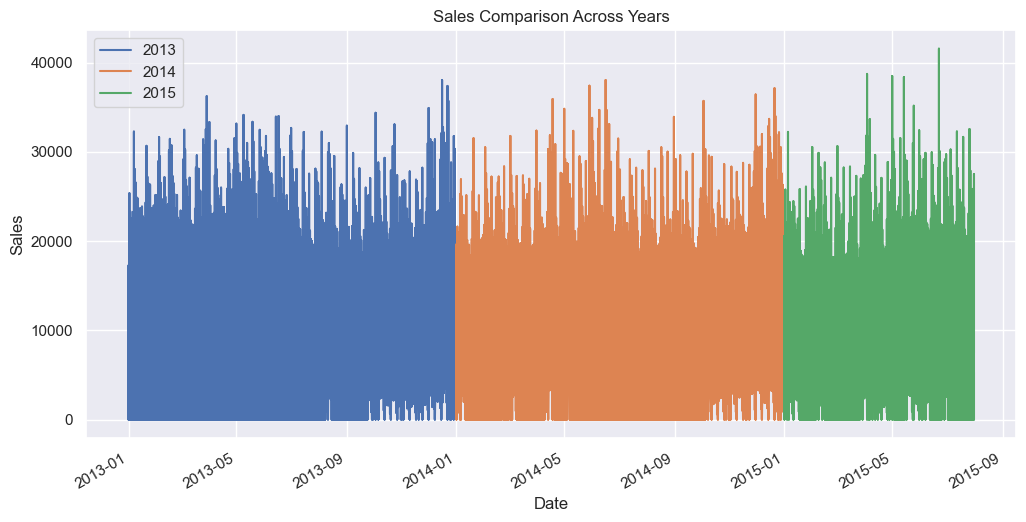

In [37]:
# Filtering data for each year
sales_2013 = train_data_merged[train_data_merged.index.year == 2013]['Sales']
sales_2014 = train_data_merged[train_data_merged.index.year == 2014]['Sales']
sales_2015 = train_data_merged[train_data_merged.index.year == 2015]['Sales']

# Plotting comparison across years
plt.figure(figsize=(12, 6))
sales_2013.plot(label='2013')
sales_2014.plot(label='2014')
sales_2015.plot(label='2015')
plt.title('Sales Comparison Across Years')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Stationarity Check

In [38]:
from statsmodels.tsa.stattools import adfuller

In [39]:
# 'Date' is index and 'Sales' is target variable
time_series = train_data_merged['Sales']

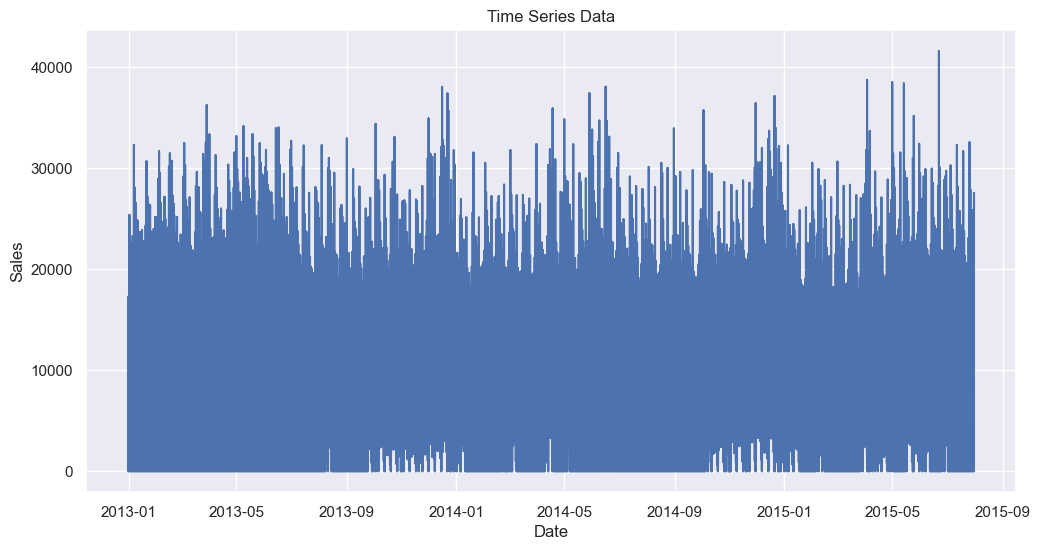

In [40]:
# Visualizing the time series data
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['Sales'])
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Cyclicality:
Cyclicality refers to the presence of long-term periodic patterns in a time series that are not tied to a fixed frequency like seasonality. These cycles usually last longer than a year and are not as regular as seasonal patterns. Cycles can be caused by economic, political, or social factors that influence the data over time. Unlike seasonality, cyclic patterns are not as predictable and can vary in amplitude and duration.

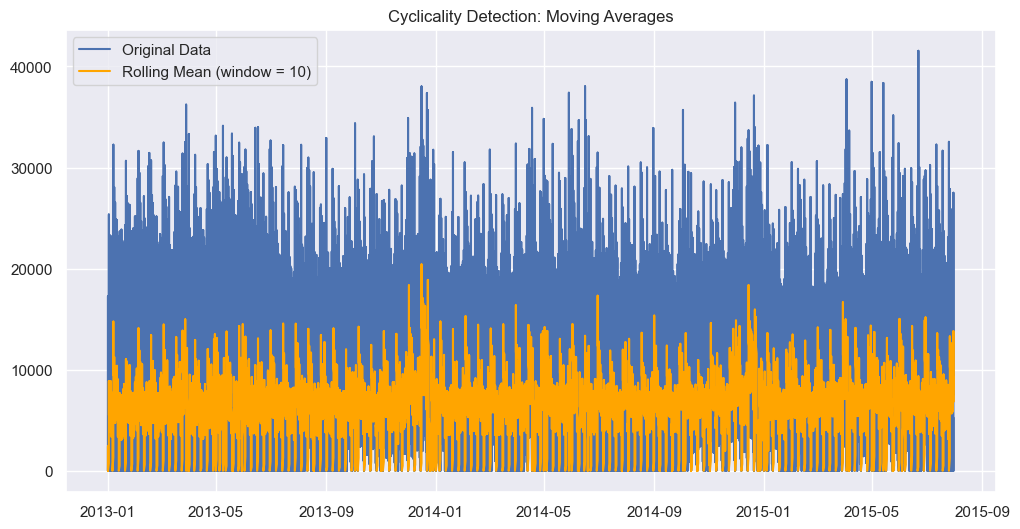

In [41]:
# Calculate rolling mean with a window size of your choice
window_size = 10  #
rolling_mean = train_data_merged['Sales'].rolling(window=window_size).mean()

# Plot the original data and rolling mean
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged['Sales'], label='Original Data')
plt.plot(rolling_mean, label=f'Rolling Mean (window = {window_size})', color='orange')
plt.title('Cyclicality Detection: Moving Averages')
plt.legend()
plt.show()

# Irregularity:
Irregularity, also known as residual or noise, represents the random fluctuations and unpredictable components present in a time series data. It encompasses all the factors that are not accounted for by the trend, seasonality, and cyclic patterns. Irregular components can be caused by random events, measurement errors, or other external factors that are difficult to model.

In [42]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller


In [43]:
# Define a function to perform the ADF test
def adf_test(series):
    result = adfuller(series)
    print("ADF Statistic:", result[0])
    print("p-value:", result[1])
    print("Critical Values:", result[4])
    print("Is Stationary:", result[1] <= 0.05)

# Subsample a portion of the time series
subsample_size = 1000  # Adjust the size as needed
subsampled_series = train_data_merged['Sales'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)


ADF Statistic: -20.25483198977813
p-value: 0.0
Critical Values: {'1%': -3.4369193380671, '5%': -2.864440383452517, '10%': -2.56831430323573}
Is Stationary: True


In [44]:
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller

# Subsample a portion of the time series
subsample_size = 1000  
subsampled_series = train_data_merged['Sales'].sample(n=subsample_size)

# Perform the ADF test on the subsampled series
adf_test(subsampled_series)

ADF Statistic: -29.70270204820844
p-value: 0.0
Critical Values: {'1%': -3.4369127451400474, '5%': -2.864437475834273, '10%': -2.568312754566378}
Is Stationary: True


In [45]:
# Resample the time series data to a larger time interval (e.g., monthly)
monthly_aggregated_series = train_data_merged['Sales'].resample('M').sum()

# Perform the ADF test on the aggregated series
adf_test(monthly_aggregated_series)

ADF Statistic: -3.544365436259655
p-value: 0.0069181756365769885
Critical Values: {'1%': -3.6699197407407405, '5%': -2.9640707407407407, '10%': -2.621171111111111}
Is Stationary: True


In [46]:
import copy
from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 15, 10
warnings.filterwarnings('ignore')

In [47]:
def show_plot(
    data,
    figsize=(15, 10),
    color="blue",
    linestyle="-",
    xlabel="Time",
    ylabel="Value",
    label=None,
):
    plt.figure(figsize=figsize)
    plt.plot(data.index, data, color=color, linestyle=linestyle, label=label)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=2)


# ARIMA (AutoRegressive Integrated Moving Average):
ARIMA models are versatile and can handle both trend and seasonality in data. They consist of three main components: AutoRegressive (AR) terms, Integrated (I) terms for differencing, and Moving Average (MA) terms. Model selection involves determining the order of these components (p, d, q) based on ACF and PACF plots. You can use functions like auto_arima from the pmdarima library for automatic ARIMA order selection. SARIMA (Seasonal ARIMA)

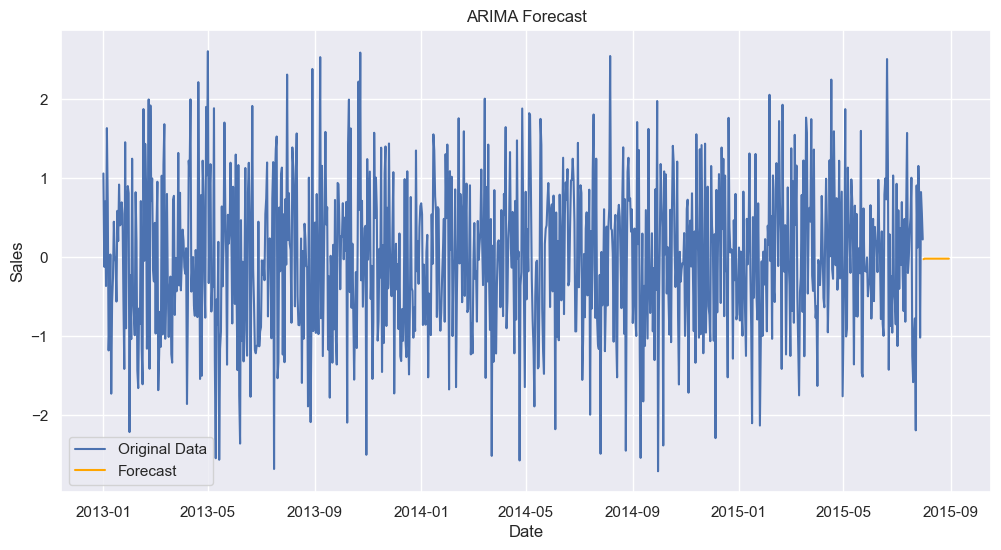

In [48]:
from statsmodels.tsa.arima.model import ARIMA


time_series_data = train_data_merged['Sales']

min_date = pd.to_datetime('2013-01-01')
max_date = pd.to_datetime('2015-07-31')
date_rng = pd.date_range(start=min_date, end=max_date, freq='D')
time_series_data = pd.Series(np.random.randn(len(date_rng)), index=date_rng)

# Fit ARIMA model
model = ARIMA(time_series_data, order=(1, 0, 0))
model_fit = model.fit()

# Make predictions for the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the original time series and the forecast
plt.figure(figsize=(12, 6))
plt.plot(time_series_data, label='Original Data')
plt.plot(forecast, label='Forecast', color='orange')
plt.legend()
plt.title('ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [49]:
pip install pmdarima


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [50]:
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller


print(train_data_merged.dtypes)


# Downsample the 'Sales' column to monthly frequency
monthly_sales = train_data_merged.resample('M')['Sales'].sum()

# Define a function to perform ADF test for stationarity
def adf_test(series):
    result = adfuller(series, autolag='AIC')
    p_value = result[1]
    return p_value <= 0.05

# Check if differencing is needed
if adf_test(monthly_sales):
    d = 0
else:
    d = 1

# Use auto_arima for automatic ARIMA order selection
model = auto_arima(monthly_sales, start_p=1, start_q=1,
                   max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True,
                   d=d, D=1, trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=True)

# Fit the ARIMA model
model_fit = model.fit(monthly_sales)

# Print the model summary
print(model_fit.summary())


Store                          int64
DayOfWeek                      int64
Sales                          int64
Customers                      int64
Open                           int64
Promo                          int64
StateHoliday                   int64
SchoolHoliday                  int64
StoreType                      int64
Assortment                     int64
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                  int64
Year                           int64
Month                          int64
Day                            int64
Weekday                        int64
IsWeekend                      int64
DaysToHoliday                  int64
DaysAfterHoliday               int64
IsBeginningOfMonth             int64
IsMidMonth                     int64
IsEndOfMonth                   int64
I

# ExponentialSmoothing

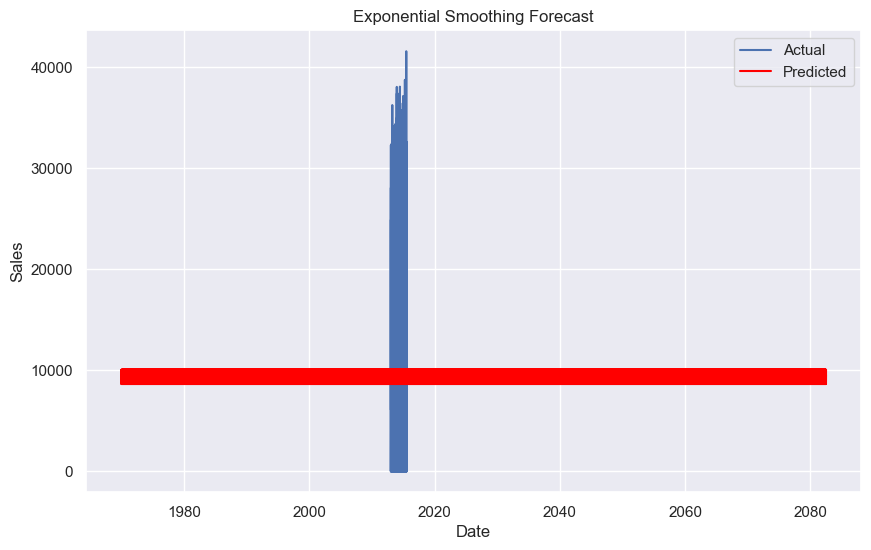

In [51]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing


time_series = train_data_merged['Sales']

# Apply Exponential Smoothing
model = ExponentialSmoothing(time_series, seasonal='add', seasonal_periods=7)
model_fit = model.fit()

# Make predictions
predictions = model_fit.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(time_series, label='Actual')
plt.plot(test_data_merged.index, predictions, color='red', label='Predicted')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

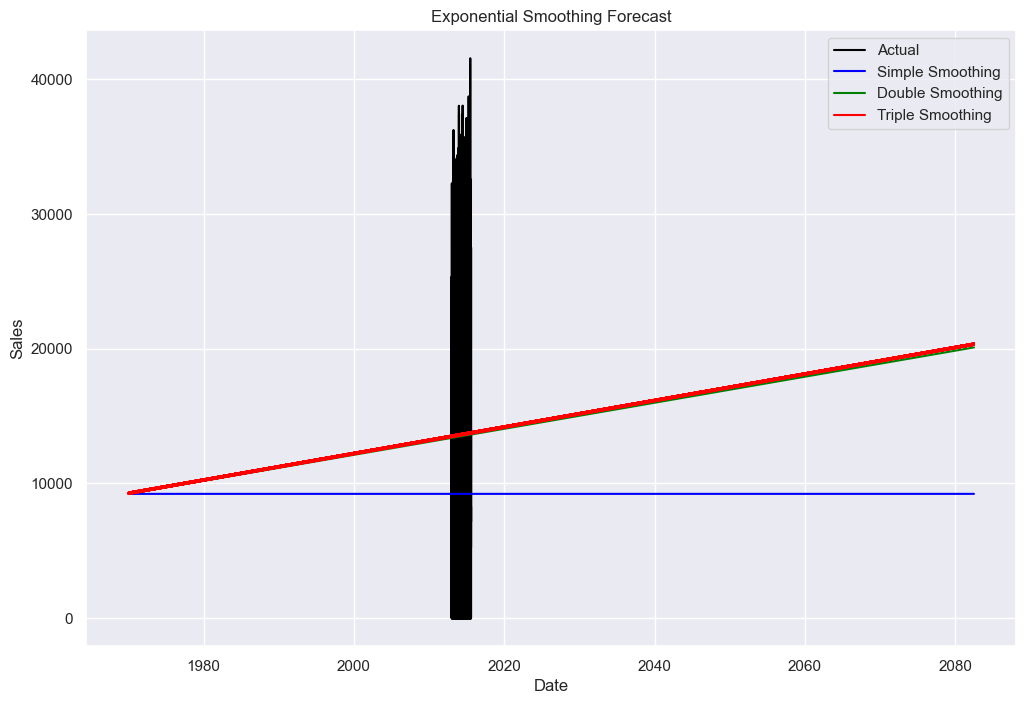

In [52]:
# Simple Exponential Smoothing
model_simple = ExponentialSmoothing(time_series, trend=None, seasonal=None)
model_fit_simple = model_simple.fit()
predictions_simple = model_fit_simple.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Double Exponential Smoothing (Holt's Method)
model_double = ExponentialSmoothing(time_series, trend='add', seasonal=None)
model_fit_double = model_double.fit()
predictions_double = model_fit_double.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Triple Exponential Smoothing (Holt-Winters' Method)
model_triple = ExponentialSmoothing(time_series, trend='add', seasonal='add', seasonal_periods=7)
model_fit_triple = model_triple.fit()
predictions_triple = model_fit_triple.predict(start=len(time_series), end=len(time_series) + len(test_data_merged) - 1)

# Plot actual vs. predicted values for all methods
plt.figure(figsize=(12, 8))
plt.plot(time_series, label='Actual', color='black')
plt.plot(test_data_merged.index, predictions_simple, label='Simple Smoothing', color='blue')
plt.plot(test_data_merged.index, predictions_double, label="Double Smoothing", color='green')
plt.plot(test_data_merged.index, predictions_triple, label="Triple Smoothing", color='red')
plt.legend()
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [53]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\adv_proj_rossman_sales_project\rossman_sales_prediction_nexthikes\venv\lib\site-packages (2.13.0)




[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
from tensorflow import keras

In [56]:
selected_column = 'Sales'

time_series_data = train_data_merged[selected_column].values


In [57]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(time_series_data.reshape(-1, 1))

# Define the number of time steps to look back
look_back = 10  

In [58]:
from sklearn.metrics import mean_squared_error

Epoch 1/10
25430/25430 - 169s - loss: 0.0041 - val_loss: 0.0041 - 169s/epoch - 7ms/step
Epoch 2/10
25430/25430 - 160s - loss: 0.0041 - val_loss: 0.0041 - 160s/epoch - 6ms/step
Epoch 3/10
25430/25430 - 156s - loss: 0.0040 - val_loss: 0.0040 - 156s/epoch - 6ms/step
Epoch 4/10
25430/25430 - 167s - loss: 0.0040 - val_loss: 0.0040 - 167s/epoch - 7ms/step
Epoch 5/10
25430/25430 - 209s - loss: 0.0040 - val_loss: 0.0040 - 209s/epoch - 8ms/step
Epoch 6/10
25430/25430 - 146s - loss: 0.0039 - val_loss: 0.0039 - 146s/epoch - 6ms/step
Epoch 7/10
25430/25430 - 150s - loss: 0.0039 - val_loss: 0.0038 - 150s/epoch - 6ms/step
Epoch 8/10
25430/25430 - 159s - loss: 0.0038 - val_loss: 0.0037 - 159s/epoch - 6ms/step
Epoch 9/10
25430/25430 - 153s - loss: 0.0037 - val_loss: 0.0037 - 153s/epoch - 6ms/step
Epoch 10/10
25430/25430 - 153s - loss: 0.0036 - val_loss: 0.0036 - 153s/epoch - 6ms/step


2023/08/29 00:48:49 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Assets written to: C:\Users\manil\AppData\Local\Temp\tmppm6tfjas\model\data\model\assets


INFO:tensorflow:Assets written to: C:\Users\manil\AppData\Local\Temp\tmppm6tfjas\model\data\model\assets


6358/6358 [==============================] - 19s 3ms/step


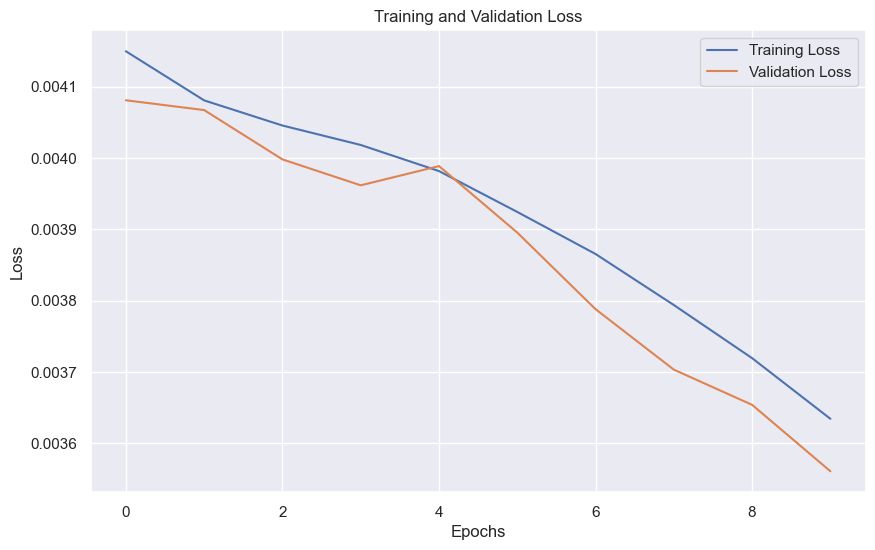

MLflow run completed with run_id: aa1c8fd84709455580f3a1c1298e9dee


In [59]:
import mlflow
import mlflow.keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Start an MLflow run
with mlflow.start_run() as run:
    look_back = 10
    # Prepare the input sequences and target values
    X = []
    y = []
    for i in range(len(normalized_data) - look_back):
        X.append(normalized_data[i:i + look_back])
        y.append(normalized_data[i + look_back])
    X = np.array(X)
    y = np.array(y)

    # Split the data into training and validation sets
    split_ratio = 0.8
    split_index = int(split_ratio * len(X))
    X_train, X_val = X[:split_index], X[split_index:]
    y_train, y_val = y[:split_index], y[split_index:]
    
    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(units=64, input_shape=(look_back, 1)))
    model.add(Dense(units=1))
    model.compile(loss='mean_squared_error', optimizer='adam')

    # Train the model
    history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val), verbose=2)

    # Log parameters and metrics to MLflow
    mlflow.log_params({"look_back": look_back, "epochs": 10, "batch_size": 32})
    mlflow.keras.log_model(model, "lstm_model")

    # Calculate predictions on validation data
    y_val_pred = model.predict(X_val)

    # Inverse transform the scaled predictions and actual values to the original scale
    y_val = scaler.inverse_transform(y_val.reshape(-1, 1))
    y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))

    # Calculate evaluation metrics
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_val, y_val_pred)

    # Log metrics to MLflow
    mlflow.log_metrics({"mse": mse, "rmse": rmse, "mae": mae})

    # Plot training loss and validation loss
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()

print("MLflow run completed with run_id:", run.info.run_id)


In [60]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, y_val_pred)
print("Mean Absolute Error (MAE):", mae)

# Mean Squared Error (MSE)
mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error (MSE):", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_actual, y_pred):
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(y_val, y_val_pred)
print("Mean Absolute Percentage Error (MAPE):", mape)

# Symmetric Mean Absolute Percentage Error (sMAPE)
def symmetric_mean_absolute_percentage_error(y_actual, y_pred):
    return np.mean(2 * np.abs(y_pred - y_actual) / (np.abs(y_actual) + np.abs(y_pred))) * 100

smape = symmetric_mean_absolute_percentage_error(y_val, y_val_pred)
print("Symmetric Mean Absolute Percentage Error (sMAPE):", smape)

# Percentage Error (PE)
percentage_error = ((y_val - y_val_pred) / y_val) * 100
print("Percentage Error (PE):", percentage_error)

# Forecast Bias
forecast_bias = np.mean(y_val_pred - y_val)
print("Forecast Bias:", forecast_bias)

# Mean Forecast Error (MFE)
mean_forecast_error = np.mean(y_val_pred - y_val)
print("Mean Forecast Error (MFE):", mean_forecast_error)

# Coefficient of Determination (R-squared or R²)
r2 = 1 - (np.sum((y_val - y_val_pred)**2) / np.sum((y_val - np.mean(y_val))**2))
print("Coefficient of Determination (R²):", r2)

# Mean Absolute Scaled Error (MASE)
def mean_absolute_scaled_error(y_actual, y_pred):
    naive_error = np.sum(np.abs(y_actual[1:] - y_actual[:-1]))
    model_error = np.sum(np.abs(y_val - y_val_pred))
    return model_error / naive_error

mase = mean_absolute_scaled_error(y_val, y_val_pred)
print("Mean Absolute Scaled Error (MASE):", mase)


Mean Absolute Error (MAE): 1652.1518236424317
Mean Squared Error (MSE): 6147429.823482141
Root Mean Squared Error (RMSE): 2479.40110177481
Mean Absolute Percentage Error (MAPE): inf
Symmetric Mean Absolute Percentage Error (sMAPE): 56.929403792218956
Percentage Error (PE): [[ 26.50487993]
 [ 26.23310915]
 [ 15.8063404 ]
 ...
 [-25.6745735 ]
 [-11.36822381]
 [-80.16336779]]
Forecast Bias: 40.81119753474877
Mean Forecast Error (MFE): 40.81119753474877
Coefficient of Determination (R²): 0.5884217618852202
Mean Absolute Scaled Error (MASE): 0.7000963200218709


In [61]:
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)

def mean_absolute_percentage_error(y_actual, y_pred):
    return np.mean(np.abs((y_actual - y_pred) / y_actual)) * 100

mape = mean_absolute_percentage_error(y_val, y_val_pred)

def symmetric_mean_absolute_percentage_error(y_actual, y_pred):
    return np.mean(2 * np.abs(y_pred - y_actual) / (np.abs(y_actual) + np.abs(y_pred))) * 100

smape = symmetric_mean_absolute_percentage_error(y_val, y_val_pred)

percentage_error = ((y_val - y_val_pred) / y_val) * 100
forecast_bias = np.mean(y_val_pred - y_val)
mean_forecast_error = np.mean(y_val_pred - y_val)
r2 = 1 - (np.sum((y_val - y_val_pred)**2) / np.sum((y_val - np.mean(y_val))**2))

def mean_absolute_scaled_error(y_actual, y_pred):
    naive_error = np.sum(np.abs(y_actual[1:] - y_actual[:-1]))
    model_error = np.sum(np.abs(y_val - y_val_pred))
    return model_error / naive_error

mase = mean_absolute_scaled_error(y_val, y_val_pred)

# Create a dictionary of evaluation metrics
evaluation_dict = {
    "Mean Absolute Error (MAE)": mae,
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Percentage Error (MAPE)": mape,
    "Symmetric Mean Absolute Percentage Error (sMAPE)": smape,
    "Percentage Error (PE)": percentage_error,
    "Forecast Bias": forecast_bias,
    "Mean Forecast Error (MFE)": mean_forecast_error,
    "Coefficient of Determination (R²)": r2,
    "Mean Absolute Scaled Error (MASE)": mase
}

# Create a DataFrame from the dictionary
evaluation_df = pd.DataFrame.from_dict(evaluation_dict, orient="index", columns=["Value"])

# Print the DataFrame
print(evaluation_df)

                                                                                              Value
Mean Absolute Error (MAE)                                                               1652.151824
Mean Squared Error (MSE)                                                             6147429.823482
Root Mean Squared Error (RMSE)                                                          2479.401102
Mean Absolute Percentage Error (MAPE)                                                           inf
Symmetric Mean Absolute Percentage Error (sMAPE)                                          56.929404
Percentage Error (PE)                             [[26.50487992752954], [26.2331091530333], [15....
Forecast Bias                                                                             40.811198
Mean Forecast Error (MFE)                                                                 40.811198
Coefficient of Determination (R²)                                                          0.588422


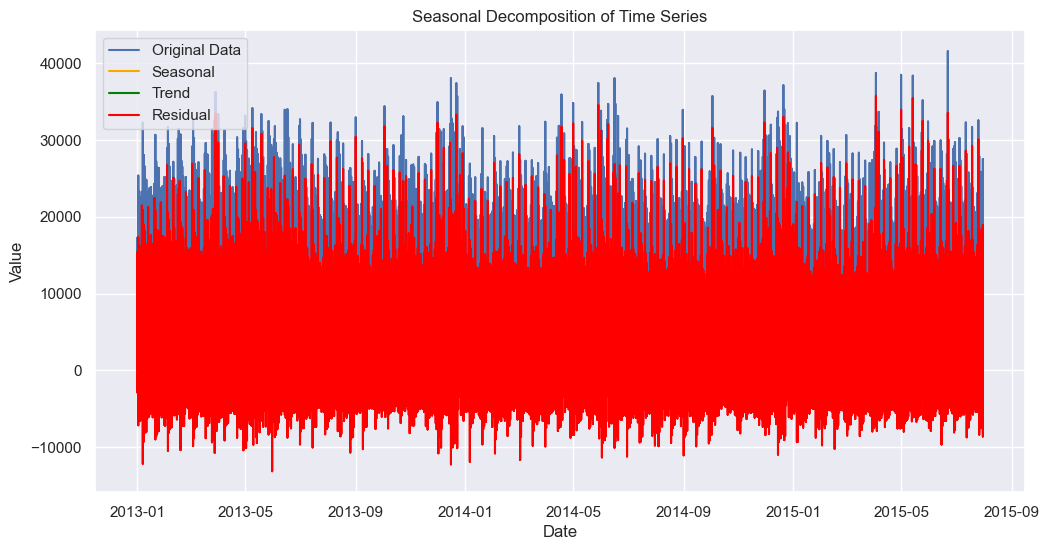

In [62]:
from statsmodels.tsa.seasonal import STL

from statsmodels.tsa.seasonal import seasonal_decompose

selected_column = 'Sales'

# Perform seasonal decomposition using statsmodels
decomposition = seasonal_decompose(train_data_merged[selected_column], period=13)

# Get the seasonal, trend, and residual components
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(12, 6))
plt.plot(train_data_merged[selected_column], label='Original Data')
plt.plot(seasonal, label='Seasonal', color='orange')
plt.plot(trend, label='Trend', color='green')
plt.plot(residual, label='Residual', color='red')
plt.legend()
plt.title('Seasonal Decomposition of Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()



In [63]:
from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping
early_stop = EarlyStopping(monitor = "loss", mode = "min", patience = 7)
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=2, activation='relu', input_shape=(30,1)))
model.add(Conv1D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(RepeatVector(30))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Dropout(0.2))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(LSTM(units=100, return_sequences=True, activation='relu'))
model.add(Bidirectional(LSTM(128, activation='relu')))
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')

In [64]:
import pickle

In [65]:
pip install mlflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [66]:
import os

In [68]:
import os
import mlflow
import mlflow.sklearn

# Define the path to the saved model
model_path = 'lstm_model.pickle'

# Check if the model file exists in the specified path
if os.path.exists(model_path):
    # Load the existing MLflow run
    with mlflow.start_run(run_id="aa1c8fd84709455580f3a1c1298e9dee") as run:
        print("Model saved successfully.")

        # Log the model to MLflow with the specified artifact path
        mlflow.sklearn.log_model("lstm_model", artifact_path="models")

        # Get the artifact path for the logged model
        model_artifact_path = f"models/lstm_model/{run.info.run_id}/artifacts"
        artifact_uri = mlflow.get_artifact_uri(run_id=run.info.run_id, artifact_path=model_artifact_path)
        print("Model artifact URI:", artifact_uri)
else:
    print("Model saving failed.")

Model saving failed.


In [69]:
with open(model_path, 'wb') as f:
    pickle.dump(model, f)


In [71]:
import os
import mlflow
import mlflow.sklearn

# Define the path to the saved model
model_path = 'lstm_model.pickle'

# Check if the model file exists in the specified path
if os.path.exists(model_path):
    # Load the existing MLflow run
    with mlflow.start_run(run_id="aa1c8fd84709455580f3a1c1298e9dee") as run:
        print("Model saved successfully.")

        # Log the model to MLflow with the specified artifact path
        mlflow.sklearn.log_model("lstm_model", artifact_path="models")

        # Get the artifact path for the logged model
        model_artifact_path = "models/lstm_model"  # Specify the correct artifact path
        artifact_uri = mlflow.get_artifact_uri(artifact_path=model_artifact_path)
        print("Model artifact URI:", artifact_uri)
else:
    print("Model saving failed.")


2023/08/29 00:53:43 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Model saved successfully.
Model artifact URI: file:///c:/Adv_proj_Rossman_sales_project/rossman_sales_prediction_nexthikes/mlruns/0/aa1c8fd84709455580f3a1c1298e9dee/artifacts/models/lstm_model
